Visualization of second-level analysis results
=====================================================================

In [12]:
import nibabel as nib
import glob as glob
from nilearn.plotting import plot_stat_map
from nilearn import datasets, surface, plotting

Getting statistical map
-----------------------------------

In [13]:
stat_img = nib.load(glob.glob('FSLAnalysis/grp_all/sub-all/func/*clust_zstat.nii.gz')[0])
sub10_img = nib.load(glob.glob('FSLAnalysis/sub-10/func/*zstat.nii.gz')[0])

Plotting statistical maps on glass brain
-----------------------------------

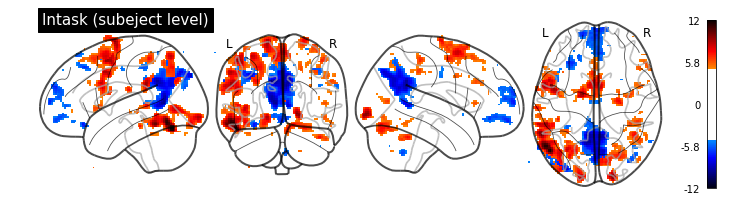

In [14]:
glass_img_sub10 = plotting.plot_glass_brain(sub10_img,
                          title='Intask (subeject level)',
                          threshold = 5,
                          display_mode='lyrz',
                          plot_abs=False,
                          colorbar=True,
                          )

glass_img_sub10.savefig("sub-10_zstat.svg")


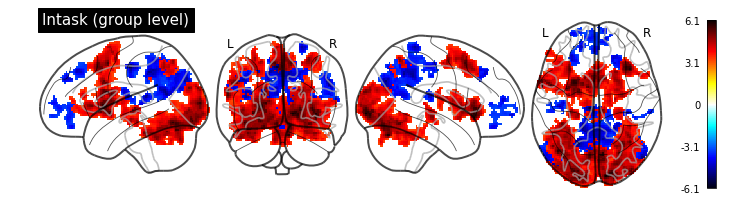

In [15]:
glass_img = plotting.plot_glass_brain(stat_img,
                          title='Intask (group level)',
                          display_mode='lyrz',
                          plot_abs=False,
                          colorbar=True,
                         )

glass_img.savefig("glass_zstat_clust.svg")

Plotting statistical maps on brain sections (group level)
-----------------------------------

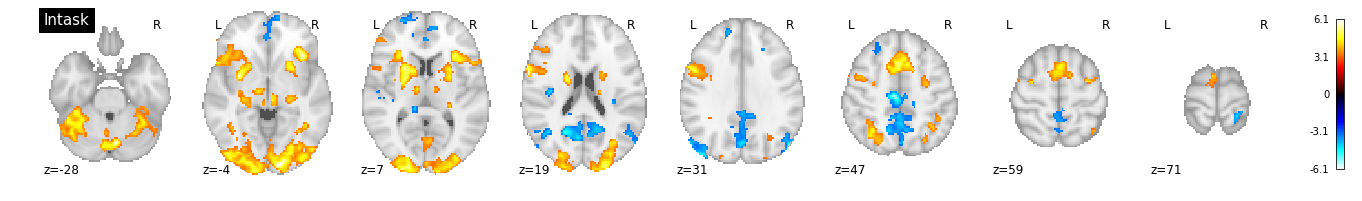

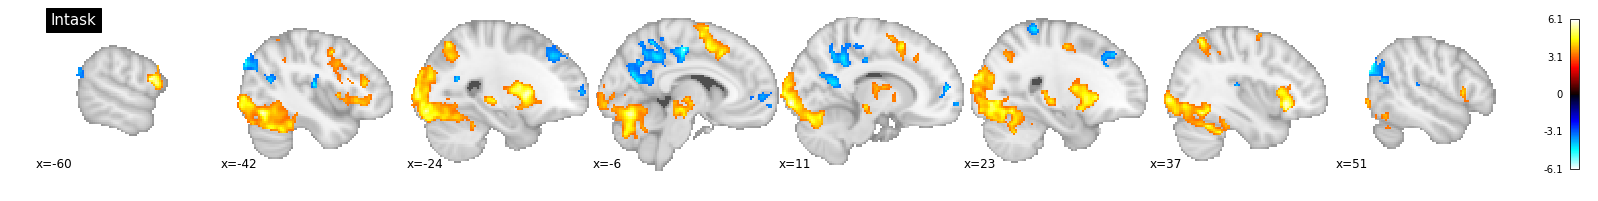

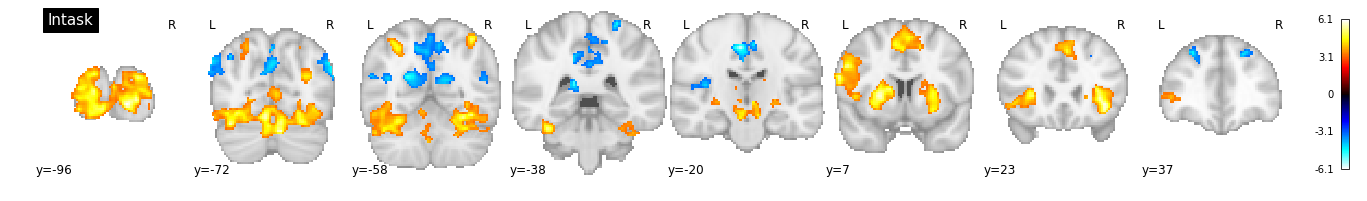

In [16]:
sections = ['z', 'x', 'y']

for section in sections:
    plotting.plot_stat_map(stat_img, 
                  threshold=0,
                  display_mode=section, 
                  cut_coords=8, 
                  black_bg=False,
                  title='Intask')

Plotting statistical maps on brain surface (group level)
-----------------------------------

Get a high-resolution cortical mesh:

In [17]:
big_fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

Plot results on right hemisphere surface:

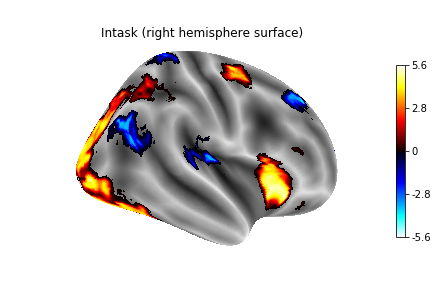

In [18]:
big_texture_right = surface.vol_to_surf(stat_img, big_fsaverage.pial_right)

surf_plot_right = plotting.plot_surf_stat_map(big_fsaverage.infl_right,
                            big_texture_right, 
                            hemi='right', colorbar=True,
                            title='Intask (right hemisphere surface)',
                            threshold=None, 
                            bg_map=big_fsaverage.sulc_right, 
                            vmax = 5.6
                            )

#surf_plot_right.savefig("surf_plot_right_zstat_clust.png", dpi = 300)

Plot results on left hemisphere surface:

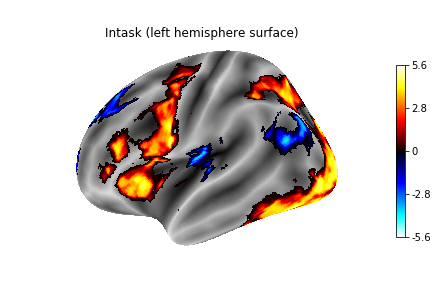

In [19]:
big_texture_left = surface.vol_to_surf(stat_img, big_fsaverage.pial_left)

surf_plot_left = plotting.plot_surf_stat_map(big_fsaverage.infl_left,
                            big_texture_left, 
                            hemi='left', 
                            colorbar=True,
                            title='Intask (left hemisphere surface)',
                            threshold=None, 
                            bg_map=big_fsaverage.sulc_left,
                            vmax = 5.6
                            )

surf_plot_left.savefig("surf_plot_left_zstat_clust.png", dpi = 300)